# **CREDIT EDA ASSIGNMENT**

## Importing libraries

In [2]:
import warnings as warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data files using Pandas

## **CURRENT APPLICATION DATA : DATA CLEANING AND HANDLING MISSING VALUES**

In [4]:
inp0 = pd.read_csv("application_data.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
inp0.shape

(307511, 122)

### Calculating null values of each and every columns in percentage

In [6]:
null_data=inp0.isnull().sum()/307511*100
null_data

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

#### Eliminatining columns with null values of 60%

In [7]:
threshold = 40
drop_columns=null_data[null_data>threshold].index

In [8]:
drop_columns.size

49

In [9]:
new_inp0 = inp0.drop(columns=drop_columns)

In [10]:
new_inp0.shape

(307511, 73)

## DATA CLEANING

In [11]:
col_drops = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
             'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
             'FLAG_EMAIL','EXT_SOURCE_2','EXT_SOURCE_3'
            ]

new_inp0 = new_inp0.drop(columns=col_drops)

In [12]:
new_inp0.shape

(307511, 45)

In [13]:
new_inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
new_inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',


#### Changing all the days columns to positive values as days cannot be negative

In [15]:
col_to_positive = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',]


In [16]:
new_inp0[col_to_positive] = new_inp0[col_to_positive].abs()

In [17]:
new_inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

#### Entering null values with mean, median and mode[For numerical data we can replace null values with mean or median while for catogorial data we can replace the null values with mode]

In [18]:
new_inp0['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [19]:
new_inp0['AMT_ANNUITY'].head(10)

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
5    27517.5
6    41301.0
7    42075.0
8    33826.5
9    20250.0
Name: AMT_ANNUITY, dtype: float64

In [20]:
new_inp0['AMT_ANNUITY'].fillna(27108.5, inplace = True)

In [21]:
new_inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [22]:
new_inp0['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [23]:
new_inp0['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [24]:
new_inp0['AMT_GOODS_PRICE'].fillna(538396, inplace=True)

In [25]:
new_inp0['AMT_GOODS_PRICE'].isnull().sum()

0

In [26]:
new_inp0['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [27]:
new_inp0.groupby(new_inp0['NAME_TYPE_SUITE']).size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64

In [28]:
new_inp0['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

In [29]:
new_inp0['NAME_TYPE_SUITE'].isnull().sum()

0

In [30]:
new_inp0.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_INCOME_TYPE                   0
LIVE_REGION_NOT_WORK_REGION        0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
R

In [31]:
new_inp0['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [32]:
new_inp0['DAYS_LAST_PHONE_CHANGE'].head()

0    1134.0
1     828.0
2     815.0
3     617.0
4    1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [33]:
new_inp0['DAYS_LAST_PHONE_CHANGE'].fillna(962, inplace=True)

In [34]:
new_inp0['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [35]:
new_inp0['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [36]:
new_inp0['CNT_FAM_MEMBERS'].fillna(2, inplace=True)

In [37]:
new_inp0['CNT_FAM_MEMBERS'].isnull().sum()

0

In [38]:
new_inp0[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,0.100049,1.405292
std,2.400989,0.446698,0.362291,2.379803
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000
max,348.000000,34.000000,24.000000,344.000000


In [39]:
new_inp0[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0


In [40]:
new_inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(1, inplace=True)
new_inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
new_inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
new_inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(1, inplace=True)

In [41]:
new_inp0[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [42]:
new_inp0.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                         0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
DAYS_ID_PUBLISH                    0
REG_CITY_NOT_LIVE_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE           0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
DAYS_LAST_PHONE_CHANGE             0
REG_CITY_NOT_WORK_CITY             0
DAYS_REGISTRATION                  0
CNT_FAM_MEMBERS                    0
DAYS_BIRTH                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
D

In [43]:
new_inp0[['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.034362,0.007000,0.006402,0.267395,0.265474,1.899974
std,0.204685,0.110757,0.083849,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,8.000000,9.000000,4.000000,27.000000,261.000000,25.000000


In [44]:
new_inp0[['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].mode()

,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
new_inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
new_inp0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
new_inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
new_inp0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
new_inp0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
new_inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

In [46]:
new_inp0[['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [47]:
new_inp0['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [48]:
new_inp0['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [49]:
new_inp0['OCCUPATION_TYPE'].fillna('unknown',inplace=True)

#### Here, I have not replaced the missing value with mode as it is not appropriate to enter the missing data of occupation as laborers. Replaced them with "unknown"

In [50]:
new_inp0['OCCUPATION_TYPE'].isnull().sum()

0

In [51]:
new_inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

## **PREVIOUS APPLICATION DATA : DATA CLEANING AND HANDLING MISSING VALUES**

In [52]:
inp1 = pd.read_csv("previous_application.csv")
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
inp1.shape

(1048575, 37)

#### Removing the columns with missing value more than 60%

In [54]:
prev_null_data=inp1.isnull().sum()/1048575*100
prev_null_data

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               53.348211
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.348211
RATE_INTEREST_PRIMARY          99.645137
RATE_INTEREST_PRIVILEGED       99.645137
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.127626
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [55]:
threshold_value = 40
drop_columns2 = prev_null_data[prev_null_data>threshold_value].index

In [56]:
drop_columns2.size

11

In [57]:
new_inp1 = inp1.drop(columns=drop_columns2)

In [58]:
new_inp1.shape

(1048575, 26)

In [59]:
new_inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [60]:
new_inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

#### Removing these columns as it is not necessary for EDA

In [61]:
remove_columns =['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']

In [62]:
new_inp1 = new_inp1.drop(columns=remove_columns)

In [63]:
new_inp1.shape

(1048575, 22)

In [64]:
new_inp1['SELLERPLACE_AREA'] = new_inp1['SELLERPLACE_AREA']

In [65]:
new_inp1.isnull().sum().sort_values(ascending=True)

SK_ID_PREV                     0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
NAME_YIELD_GROUP               0
NAME_PAYMENT_TYPE              0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
AMT_CREDIT                     0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
SK_ID_CURR                     0
DAYS_DECISION                  0
PRODUCT_COMBINATION          224
CNT_PAYMENT               233006
AMT_ANNUITY               233009
AMT_GOODS_PRICE           240965
dtype: int64

### Handling missing values

In [66]:
new_inp1['PRODUCT_COMBINATION'].describe()

count     1048351
unique         17
top          Cash
freq       178352
Name: PRODUCT_COMBINATION, dtype: object

In [67]:
new_inp1['PRODUCT_COMBINATION'].mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

In [68]:
new_inp1['PRODUCT_COMBINATION'].fillna('cash', inplace=True)

In [69]:
new_inp1['PRODUCT_COMBINATION'].isnull().sum()

0

In [70]:
new_inp1['CNT_PAYMENT'].describe()

count    815569.000000
mean         15.995639
std          14.508109
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

In [71]:
new_inp1['CNT_PAYMENT'].head()

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
Name: CNT_PAYMENT, dtype: float64

In [72]:
new_inp1['CNT_PAYMENT'].fillna(16, inplace = True)

In [73]:
new_inp1['CNT_PAYMENT'].isnull().sum()

0

In [74]:
new_inp1['AMT_ANNUITY'].describe()

count    815566.000000
mean      15891.265151
std       14745.557438
min           0.000000
25%        6301.350000
50%       11250.000000
75%       20523.003750
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [75]:
new_inp1['AMT_ANNUITY'].head()

0     1730.430
1    25188.615
2    15060.735
3    47041.335
4    31924.395
Name: AMT_ANNUITY, dtype: float64

In [76]:
new_inp1['AMT_ANNUITY'].fillna(15891.265, inplace = True)

In [77]:
new_inp1['AMT_ANNUITY'].isnull().sum()

0

In [78]:
new_inp1['AMT_GOODS_PRICE'].describe()

count    8.076100e+05
mean     2.262892e+05
std      3.134490e+05
min      0.000000e+00
25%      5.058000e+04
50%      1.115116e+05
75%      2.295000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [79]:
new_inp1['AMT_GOODS_PRICE'].head()

0     17145.0
1    607500.0
2    112500.0
3    450000.0
4    337500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [80]:
new_inp1['AMT_GOODS_PRICE'].mean()

226289.2249608412

In [81]:
new_inp1['AMT_GOODS_PRICE'].median()

111511.575

In [82]:
new_inp1['AMT_GOODS_PRICE'].fillna(111512, inplace=True)

In [83]:
new_inp1.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

In [84]:
new_inp1['DAYS_DECISION'].head(10)

0    -73
1   -164
2   -301
3   -512
4   -781
5   -684
6    -14
7    -21
8   -386
9    -57
Name: DAYS_DECISION, dtype: int64

In [85]:
new_inp1['DAYS_DECISION']=new_inp1['DAYS_DECISION'].abs()

In [86]:
new_inp1['DAYS_DECISION'].head(10)

0     73
1    164
2    301
3    512
4    781
5    684
6     14
7     21
8    386
9     57
Name: DAYS_DECISION, dtype: int64

In [87]:
new_inp1.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,684,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,15891.265,0.0,0.0,111512.0,XNA,Canceled,14,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,16.0,XNA,Cash
7,1656711,296299,Cash loans,15891.265,0.0,0.0,111512.0,XNA,Canceled,21,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,16.0,XNA,Cash
8,2367563,342292,Cash loans,15891.265,0.0,0.0,111512.0,XNA,Canceled,386,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,16.0,XNA,Cash
9,2579447,334349,Cash loans,15891.265,0.0,0.0,111512.0,XNA,Canceled,57,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,16.0,XNA,Cash


In [88]:
null_values = ['XNA', -1]

In [89]:
new_inp1['NAME_CASH_LOAN_PURPOSE'].describe()

count     1048575
unique         25
top           XAP
freq       582714
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [90]:
new_inp1['NAME_CASH_LOAN_PURPOSE'].head(30)

0                   XAP
1                   XNA
2                   XNA
3                   XNA
4               Repairs
5     Everyday expenses
6                   XNA
7                   XNA
8                   XNA
9                   XNA
10                  XNA
11                  XNA
12                  XNA
13                  XAP
14                  XAP
15                  XAP
16                  XAP
17                  XAP
18                  XNA
19    Everyday expenses
20                  XNA
21                  XNA
22                  XNA
23                  XNA
24                  XNA
25                  XNA
26                  XNA
27                  XNA
28                  XAP
29                  XNA
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [91]:
new_inp1['NAME_GOODS_CATEGORY'].describe()

count     1048575
unique         28
top           XNA
freq       593690
Name: NAME_GOODS_CATEGORY, dtype: object

In [92]:
new_inp1['NAME_CLIENT_TYPE'].describe()

count      1048575
unique           4
top       Repeater
freq        771957
Name: NAME_CLIENT_TYPE, dtype: object

In [93]:
new_inp1['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     771957
New          189990
Refreshed     85411
XNA            1217
Name: count, dtype: int64

In [94]:
new_inp1['NAME_CLIENT_TYPE']=new_inp1['NAME_CLIENT_TYPE'].replace('XNA', 'Repeater')

In [95]:
new_inp1['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     773174
New          189990
Refreshed     85411
Name: count, dtype: int64

In [96]:
new_inp1['NAME_PORTFOLIO'].describe()

count     1048575
unique          5
top           POS
freq       436846
Name: NAME_PORTFOLIO, dtype: object

In [97]:
new_inp1['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      436846
Cash     287509
XNA      233006
Cards     90935
Cars        279
Name: count, dtype: int64

In [98]:
new_inp1=new_inp1.drop(columns =['NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY'])


In [99]:
new_inp1.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,73,Cash through the bank,XAP,Repeater,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,164,XNA,XAP,Repeater,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,301,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved,512,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,781,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1851241,415052,Consumer loans,9675.855,46476.0,48775.5,46476.0,Approved,1368,Cash through the bank,XAP,New,POS,XNA,Country-wide,3500,Consumer electronics,6.0,high,POS household with interest
96,2030030,133853,Consumer loans,7253.055,104809.5,121410.0,104809.5,Approved,346,Cash through the bank,XAP,Repeater,POS,XNA,Country-wide,3500,Consumer electronics,18.0,low_action,POS household without interest
97,1935914,191576,Consumer loans,15891.265,23400.0,23400.0,23400.0,Unused offer,1412,Cash through the bank,CLIENT,Repeater,XNA,XNA,Country-wide,3500,Consumer electronics,16.0,XNA,POS household with interest
98,1457539,307992,Consumer loans,15891.265,113215.5,113215.5,113215.5,Unused offer,520,Cash through the bank,CLIENT,New,XNA,XNA,Country-wide,25,Connectivity,16.0,XNA,POS mobile with interest


## MERGING THE NEW APPLICATION DATASET AND PREVIOUS APPLICATION DATASET

In [100]:
new_inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [101]:
new_inp1.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
NAME_PAYMENT_TYPE        object
CODE_REJECT_REASON       object
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
NAME_PRODUCT_TYPE        object
CHANNEL_TYPE             object
SELLERPLACE_AREA          int64
NAME_SELLER_INDUSTRY     object
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
PRODUCT_COMBINATION      object
dtype: object

In [102]:
final_dataset = pd.merge(new_inp0, new_inp1, how='inner', on='SK_ID_CURR')

In [103]:
final_dataset.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XAP,Repeater,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,XNA,Credit and cash offices,-1,XNA,16.0,XNA,Card Street
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XAP,Repeater,POS,XNA,Country-wide,8025,Consumer electronics,12.0,high,POS household with interest
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XAP,Repeater,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
8,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,XAP,Repeater,Cash,walk-in,Regional / Local,1200,Consumer electronics,18.0,high,Cash Street: high
9,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,XAP,Repeater,Cash,x-sell,AP+ (Cash loan),4,XNA,48.0,middle,Cash X-Sell: middle


In [104]:
final_dataset.SELLERPLACE_AREA= final_dataset.SELLERPLACE_AREA.replace(-1,'NaN')

In [105]:
final_dataset.SELLERPLACE_AREA.isnull().sum()

0

In [106]:
final_dataset=final_dataset.drop(columns=['SELLERPLACE_AREA','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                            'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'])

## HANDLING OUTLIERS

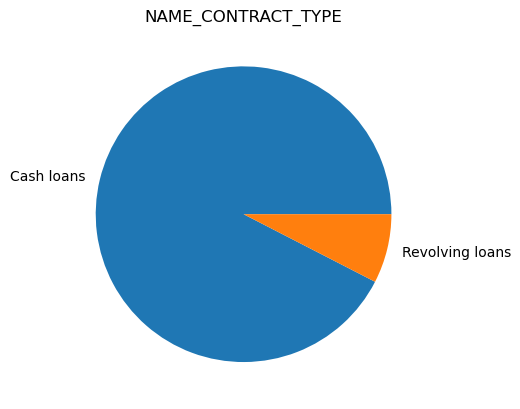

In [107]:
value_counts_NAME_CONTRACT_TYPE_x = final_dataset.NAME_CONTRACT_TYPE_x.value_counts()
value_counts_NAME_CONTRACT_TYPE_x.plot(kind="pie")
plt.title('NAME_CONTRACT_TYPE')
plt.ylabel('')
plt.show()

In [108]:
final_dataset.CODE_GENDER = final_dataset.CODE_GENDER.replace('XNA', "F")

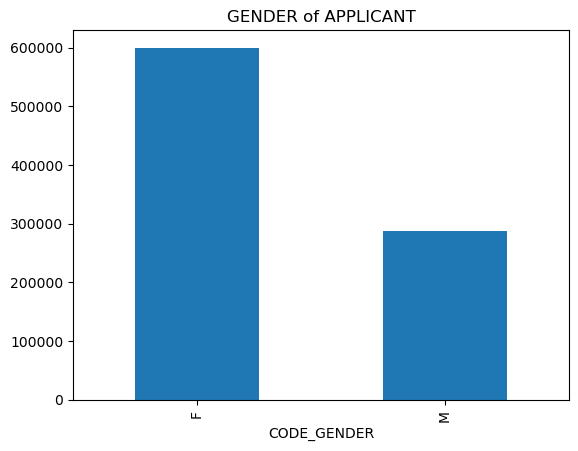

In [109]:
value_counts_CODE_GENDER = final_dataset.CODE_GENDER.value_counts()
value_counts_CODE_GENDER.plot(kind="bar")
plt.title('GENDER of APPLICANT')
plt.ylabel('')
plt.show()

In [110]:
final_dataset.CNT_CHILDREN = final_dataset.CNT_CHILDREN.astype('int')

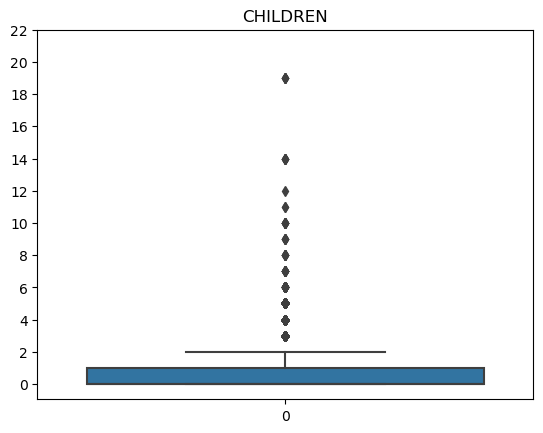

In [111]:
sns.boxplot(final_dataset.CNT_CHILDREN)
plt.title('CHILDREN')
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.show()

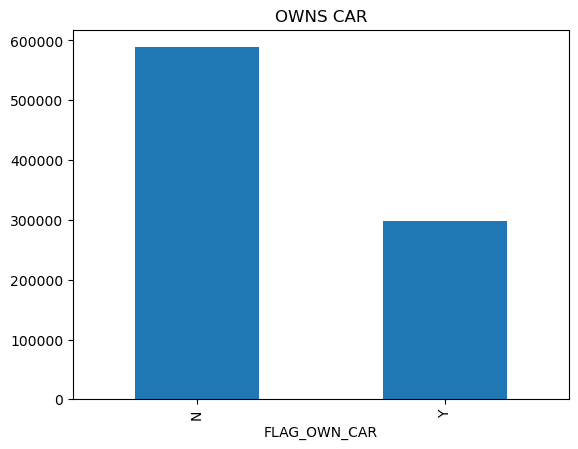

In [112]:
value_counts_FLAG_OWN_CAR = final_dataset.FLAG_OWN_CAR.value_counts()
value_counts_FLAG_OWN_CAR.plot(kind="bar")
plt.title('OWNS CAR')
plt.ylabel('')
plt.show()

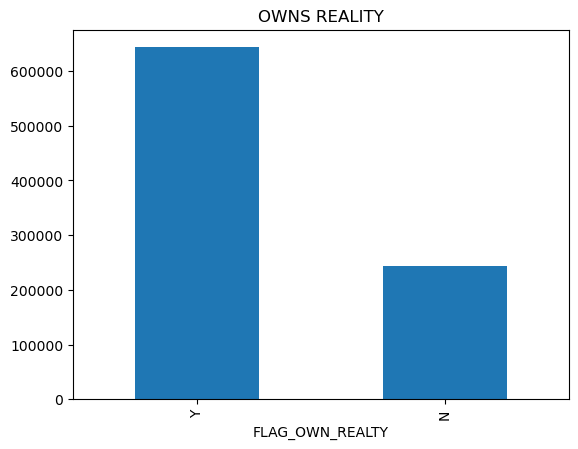

In [113]:
value_counts_FLAG_OWN_REALTY = final_dataset.FLAG_OWN_REALTY.value_counts()
value_counts_FLAG_OWN_REALTY.plot(kind="bar")
plt.title('OWNS REALITY')
plt.ylabel('')
plt.show()  	

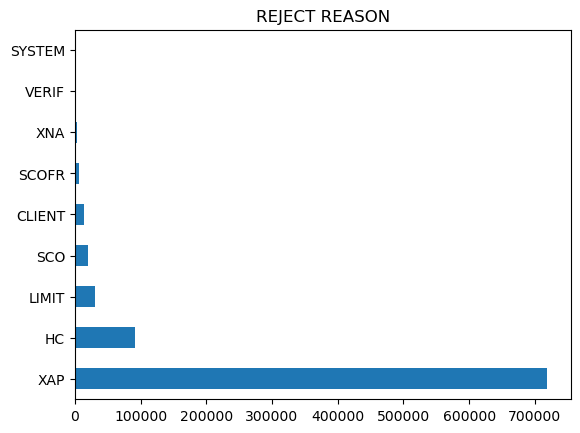

In [114]:
value_counts_CODE_REJECT_REASON = final_dataset.CODE_REJECT_REASON.value_counts()
value_counts_CODE_REJECT_REASON.plot(kind="barh")
plt.title('REJECT REASON')
plt.ylabel('')
plt.show()

In [115]:
final_dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', '

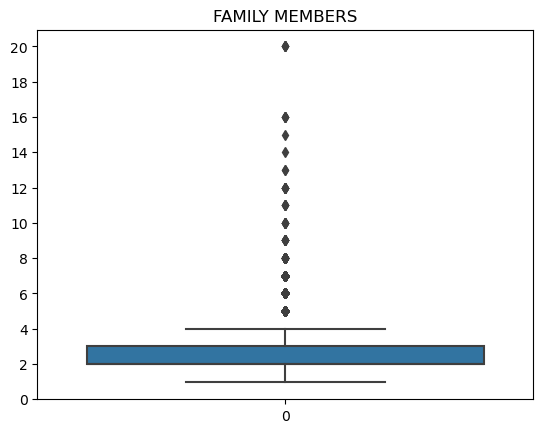

In [116]:
sns.boxplot(final_dataset.CNT_FAM_MEMBERS)
plt.title('FAMILY MEMBERS')
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

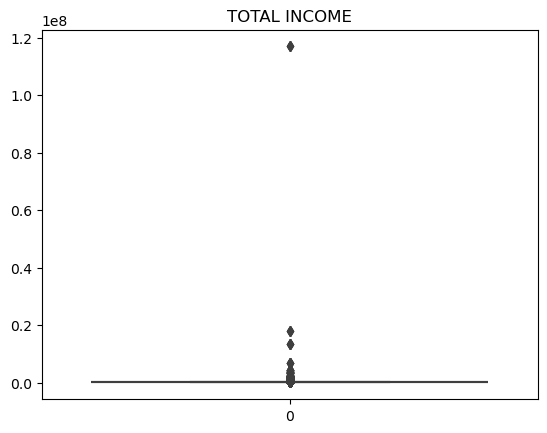

In [117]:
sns.boxplot(final_dataset.AMT_INCOME_TOTAL)
plt.title('TOTAL INCOME')
plt.ylabel('')
plt.show()

In [118]:
final_dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', '

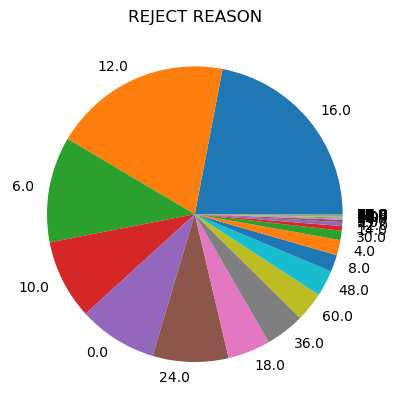

In [119]:
value_counts_CNT_PAYMENT = final_dataset.CNT_PAYMENT.value_counts()
value_counts_CNT_PAYMENT.plot(kind="pie")
plt.title('REJECT REASON')
plt.ylabel('')
plt.show()

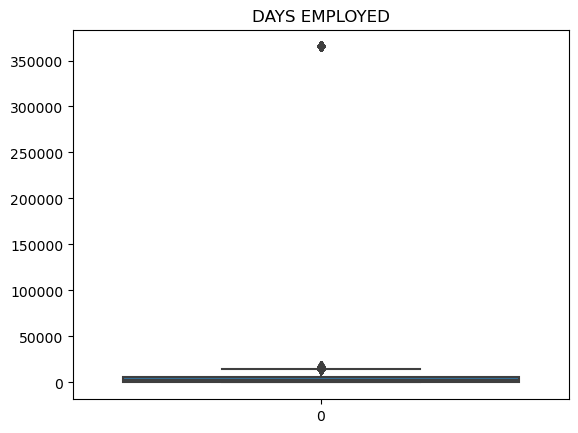

In [120]:
sns.boxplot(final_dataset.DAYS_EMPLOYED)
plt.title('DAYS EMPLOYED')
plt.ylabel('')
plt.show()

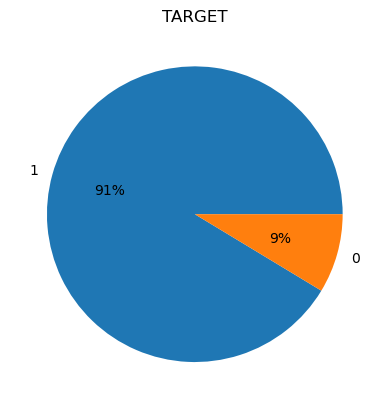

In [151]:
value_counts_TARGET = final_dataset.TARGET.value_counts()
value_counts_TARGET.plot(kind="pie", autopct='%.0f%%', labels = final_dataset['TARGET'])
plt.title('TARGET')
plt.ylabel('')
plt.show()

In [122]:
value_counts_TARGET[0]/value_counts_TARGET[1]

10.556254476785831

#### There we can see that there is payment difficulty in the ratio 1:11, most of the candidate are capable of paying back

## BIVARIANT ANALYSIS

### 1. EDUCATION VS TARGET

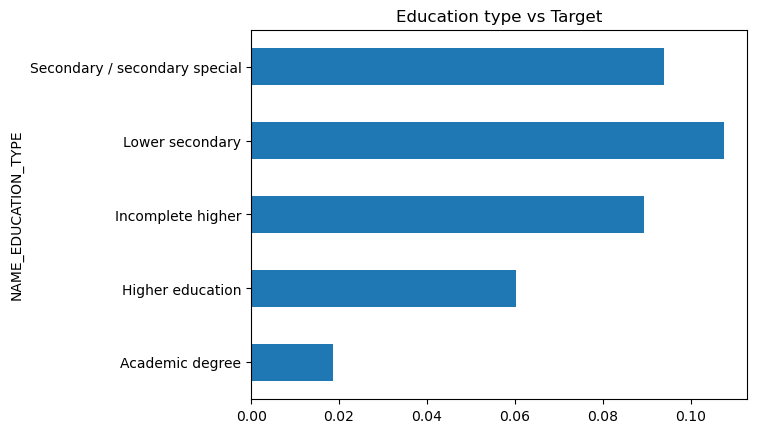

In [152]:
final_dataset.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.barh()
plt.title('Education type vs Target')
plt.show()

In [124]:
final_dataset.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018717
Higher education                 0.060331
Incomplete higher                0.089330
Lower secondary                  0.107453
Secondary / secondary special    0.093992
Name: TARGET, dtype: float64

## 2.HOUSE TYPE VS TARGET

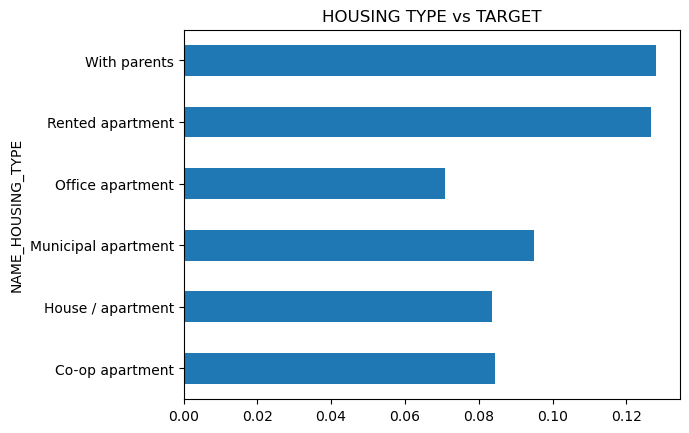

In [153]:
final_dataset.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().plot.barh()
plt.title("HOUSING TYPE vs TARGET")
plt.show()

## 3. Income Type vs Target

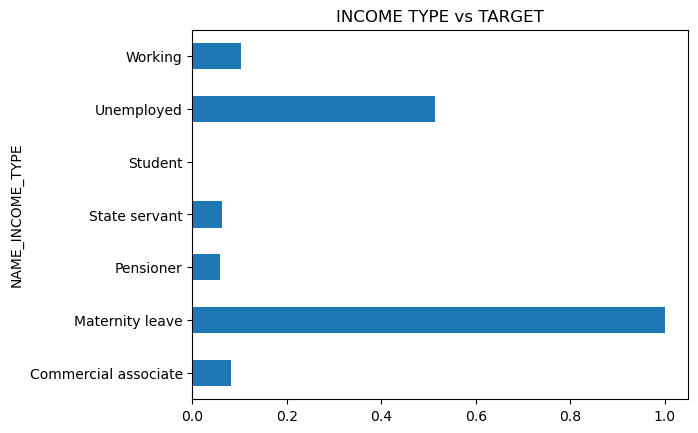

In [155]:
final_dataset.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.title("INCOME TYPE vs TARGET")
plt.show()

## 4. Name Type vs Target

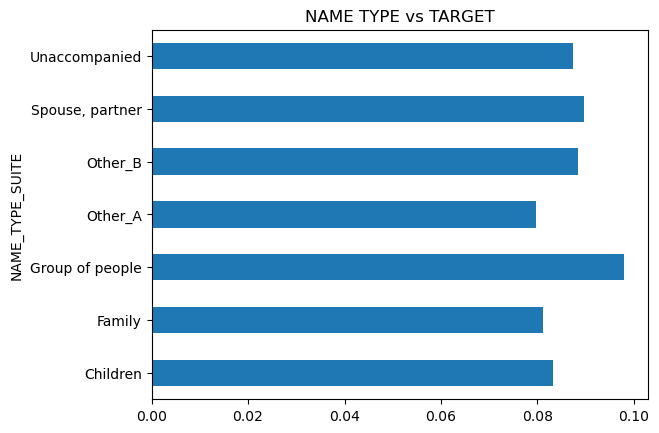

In [156]:
final_dataset.groupby(['NAME_TYPE_SUITE'])['TARGET'].mean().plot.barh()
plt.title("NAME TYPE vs TARGET")
plt.show()

## 5. Occupation Type vs Target

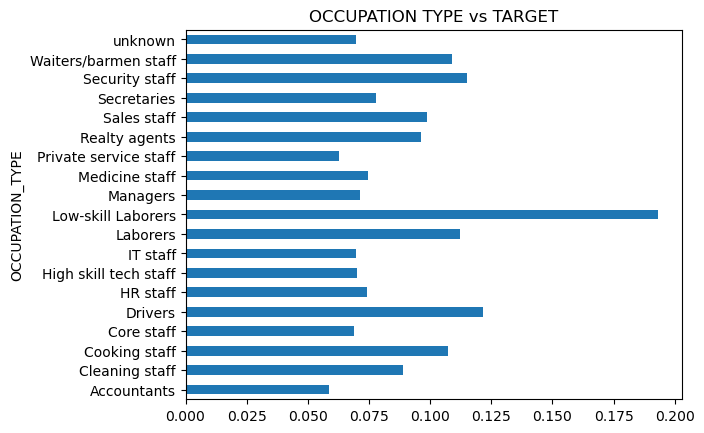

In [157]:
final_dataset.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.barh()
plt.title("OCCUPATION TYPE vs TARGET")
plt.show()

## 6. Owns car vs Target

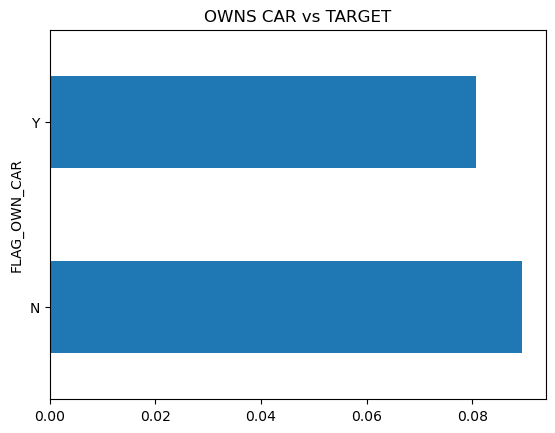

In [160]:
final_dataset.groupby(['FLAG_OWN_CAR'])['TARGET'].mean().plot.barh()
plt.title("OWNS CAR vs TARGET")
plt.show()

## 7. Owns Reality vs Target

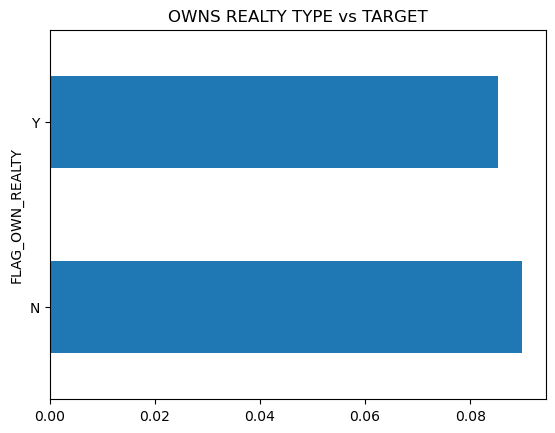

In [159]:
final_dataset.groupby(['FLAG_OWN_REALTY'])['TARGET'].mean().plot.barh()
plt.title("OWNS REALTY TYPE vs TARGET")
plt.show()

## 8. Contract Type vs Target

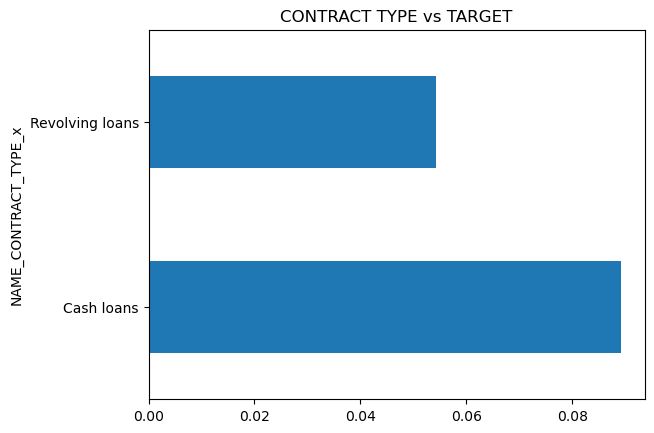

In [161]:
final_dataset.groupby(['NAME_CONTRACT_TYPE_x'])['TARGET'].mean().plot.barh()
plt.title("CONTRACT TYPE vs TARGET")
plt.show()

## 9. Family status vs Target

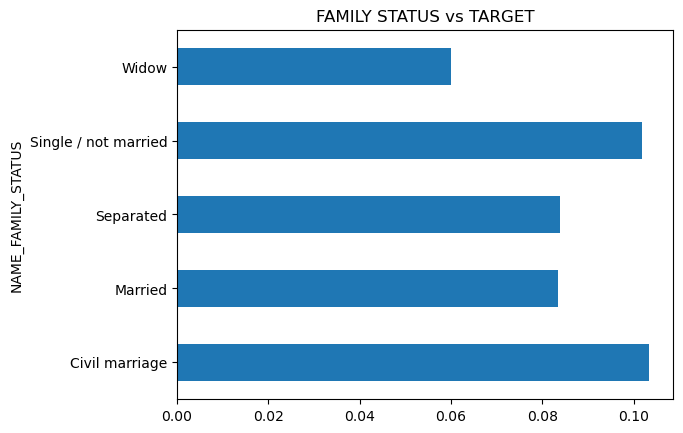

In [162]:
final_dataset.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.barh()
plt.title("FAMILY STATUS vs TARGET")
plt.show()

## 10. Gender vs Target

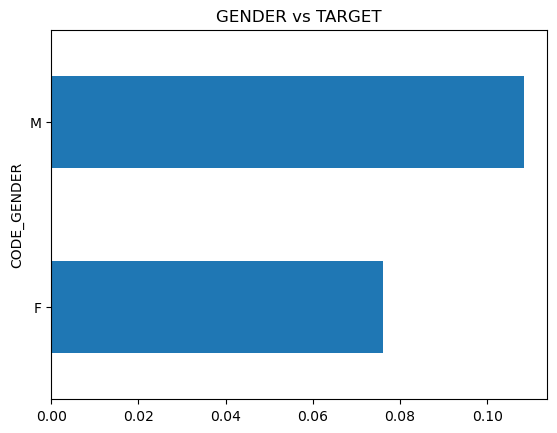

In [163]:
final_dataset.groupby(['CODE_GENDER'])['TARGET'].mean().plot.barh()
plt.title("GENDER vs TARGET")
plt.show()

In [134]:
final_dataset.groupby(['TARGET'])['AMT_CREDIT_x'].mean()

TARGET
0    590233.432547
1    559039.302325
Name: AMT_CREDIT_x, dtype: float64

## 11. Amount credit vs Target

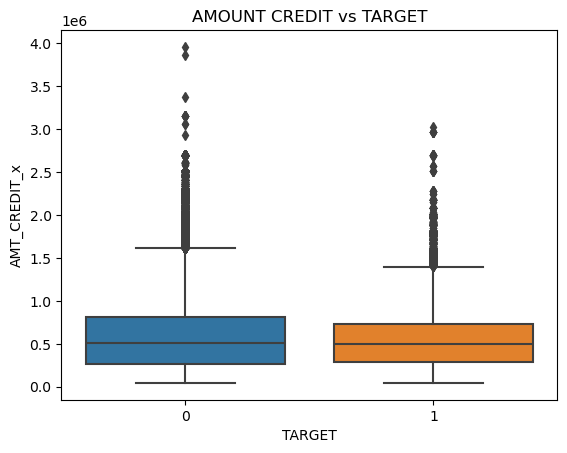

In [165]:
sns.boxplot(data=final_dataset, x='TARGET', y='AMT_CREDIT_x')
plt.title("AMOUNT CREDIT vs TARGET")
plt.show()

## 12. Amount Annuity vs Target

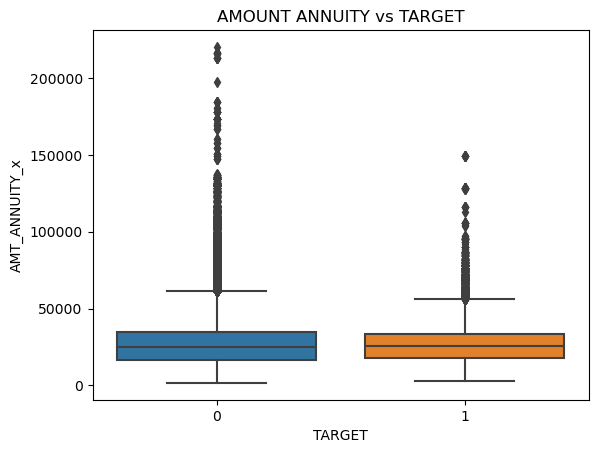

In [166]:
sns.boxplot(data=final_dataset, x='TARGET', y='AMT_ANNUITY_x')
plt.title("AMOUNT ANNUITY vs TARGET")
plt.show()

## 13. Income VS Target

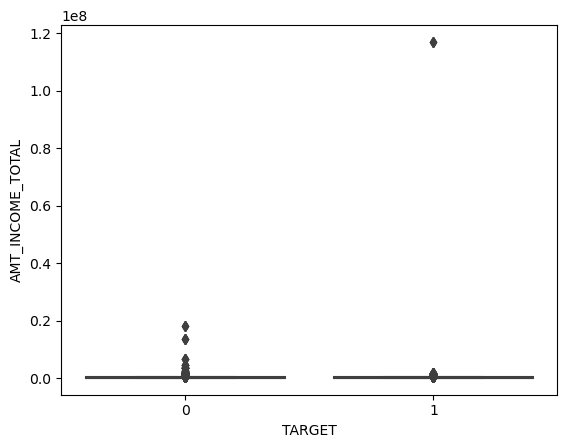

In [137]:
sns.boxplot(data=final_dataset, x='TARGET', y='AMT_INCOME_TOTAL')
plt.show()

## 14. Goods price vs Target

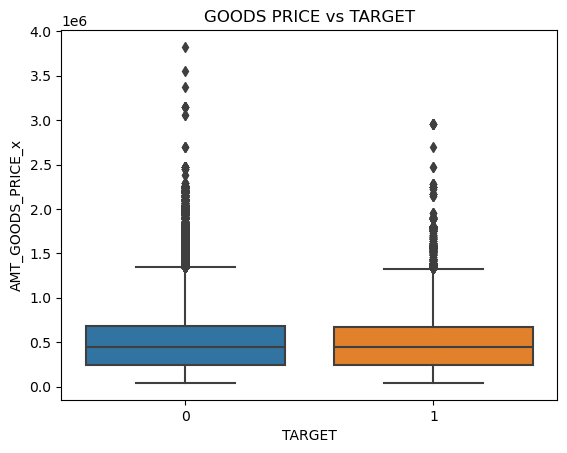

In [167]:
sns.boxplot(data=final_dataset, x='TARGET', y='AMT_GOODS_PRICE_x')
plt.title("GOODS PRICE vs TARGET")
plt.show()

## 16. Days decision vs Target

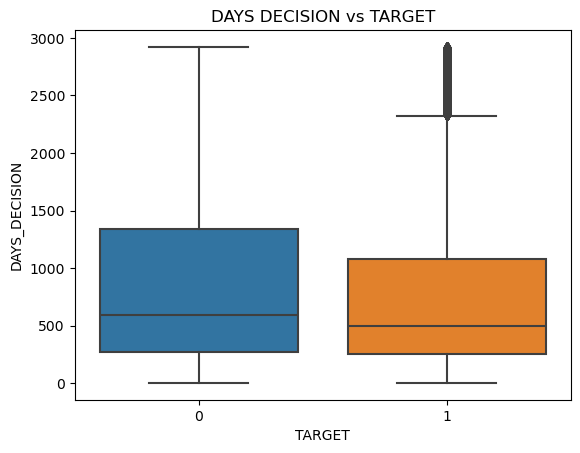

In [168]:
sns.boxplot(data=final_dataset, x='TARGET', y='DAYS_DECISION')
plt.title("DAYS DECISION vs TARGET")
plt.show()

In [140]:
final_dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', '

## 17. CONTRACT STATUS VS TARGET

Text(0, 0.5, 'NAME_CONTRACT_STATUS')

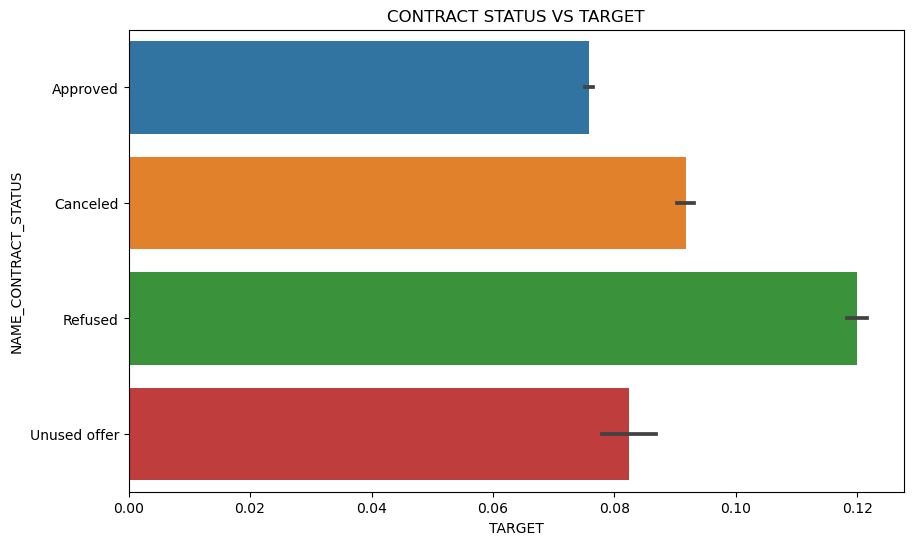

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TARGET', y='NAME_CONTRACT_STATUS', data=final_dataset)
plt.title('CONTRACT STATUS VS TARGET')
plt.xlabel('TARGET')
plt.ylabel('NAME_CONTRACT_STATUS')

## CORRELATION PLOT

In [142]:
final_dataset.dtypes.value_counts()

object     23
float64    23
int64      10
int32       1
Name: count, dtype: int64

In [143]:
numerical_variable = final_dataset.select_dtypes(include=['float64','int64','int32']).columns
numerical_columns = final_dataset[numerical_variable]

In [144]:
payment_difficulty = numerical_columns[numerical_columns['TARGET']==1]
payment_difficulty.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,CNT_PAYMENT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,0.0,0.0,1.0,1038818,9251.775,179055.0,179055.0,179055.0,606,24.0
104,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,...,2.0,0.0,4.0,1472630,22500.000,0.0,450000.0,111512.0,1172,0.0
105,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,...,2.0,0.0,4.0,2426800,11117.700,157500.0,157500.0,157500.0,1467,24.0
106,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,...,2.0,0.0,4.0,1021215,31674.870,675000.0,744498.0,675000.0,1075,36.0
107,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,...,2.0,0.0,4.0,1035321,4586.895,38205.0,34384.5,38205.0,2634,10.0
108,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,...,2.0,0.0,4.0,2060141,19197.000,450000.0,450000.0,450000.0,1072,36.0
112,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,...,0.0,0.0,2.0,1514918,5791.725,33250.5,41251.5,33250.5,1480,10.0
113,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,...,0.0,0.0,2.0,1560053,4543.110,41305.5,40855.5,41305.5,2426,12.0
286,100112,1,0,315000.0,953460.0,64107.0,900000.0,0.030755,10199,2015,...,0.0,0.0,2.0,1013085,20723.580,121135.5,109021.5,121135.5,591,6.0
287,100112,1,0,315000.0,953460.0,64107.0,900000.0,0.030755,10199,2015,...,0.0,0.0,2.0,1137576,14844.555,135085.5,135085.5,135085.5,411,10.0


In [145]:
no_payment_difficulty = numerical_columns[numerical_columns['TARGET']==0]
no_payment_difficulty.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,CNT_PAYMENT
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,0.0,0.0,1810518,98356.995,900000.0,1035882.0,900000.0,746,12.0
2,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,0.0,0.0,2636178,64567.665,337500.0,348637.5,337500.0,828,6.0
3,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,1564014,5357.250,24282.0,20106.0,24282.0,815,4.0
4,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,0.0,0.0,2078043,24246.000,675000.0,675000.0,675000.0,181,48.0
5,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,0.0,0.0,2827850,15891.265,0.0,0.0,111512.0,181,16.0
6,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,0.0,0.0,2190416,29027.520,334917.0,267930.0,334917.0,311,12.0
7,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,0.0,0.0,1489396,13500.000,270000.0,270000.0,270000.0,181,0.0
8,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,2001242,16509.600,180000.0,180000.0,180000.0,865,18.0
9,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,2730157,13010.985,225000.0,284400.0,225000.0,867,48.0
10,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1692033,16037.640,247500.0,274288.5,247500.0,374,24.0


### Top 10 correlation with variable where Target==1

In [146]:
correlations_with_target_1 = payment_difficulty.corr()
top_10_correlations_with_target_1 = correlations_with_target_1.unstack().sort_values(ascending=False)
top_10_correlations_with_target_1 = top_10_correlations_with_target_1[top_10_correlations_with_target_1.index.get_level_values(0) != top_10_correlations_with_target_1.index.get_level_values(1)]
top_10_correlations_with_target_1 = top_10_correlations_with_target_1.head(20)


top_10_correlations_with_target_1

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998403
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998403
AMT_APPLICATION              AMT_GOODS_PRICE_y              0.985811
AMT_GOODS_PRICE_y            AMT_APPLICATION                0.985811
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.982256
AMT_CREDIT_x                 AMT_GOODS_PRICE_x              0.982256
AMT_APPLICATION              AMT_CREDIT_y                   0.974656
AMT_CREDIT_y                 AMT_APPLICATION                0.974656
AMT_GOODS_PRICE_y            AMT_CREDIT_y                   0.968599
AMT_CREDIT_y                 AMT_GOODS_PRICE_y              0.968599
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956513
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956513
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885400
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885400
DEF_30_CNT_SOCIAL_CIRCLE     DEF_6

### Top 10 correlation with the variable where target = 0

In [147]:
correlations_with_target_0 = no_payment_difficulty.corr()
top_10_correlations_with_target_0 = correlations_with_target_0.unstack().sort_values(ascending=False)
top_10_correlations_with_target_0 = top_10_correlations_with_target_0[top_10_correlations_with_target_0.index.get_level_values(0) != top_10_correlations_with_target_0.index.get_level_values(1)]
top_10_correlations_with_target_0 = top_10_correlations_with_target_0.head(20)

top_10_correlations_with_target_0

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998552
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998552
AMT_GOODS_PRICE_y            AMT_APPLICATION                0.987610
AMT_APPLICATION              AMT_GOODS_PRICE_y              0.987610
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.986254
AMT_CREDIT_x                 AMT_GOODS_PRICE_x              0.986254
AMT_CREDIT_y                 AMT_APPLICATION                0.975786
AMT_APPLICATION              AMT_CREDIT_y                   0.975786
AMT_GOODS_PRICE_y            AMT_CREDIT_y                   0.971807
AMT_CREDIT_y                 AMT_GOODS_PRICE_y              0.971807
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.944131
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.944131
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878419
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878419
DEF_30_CNT_SOCIAL_CIRCLE     DEF_6

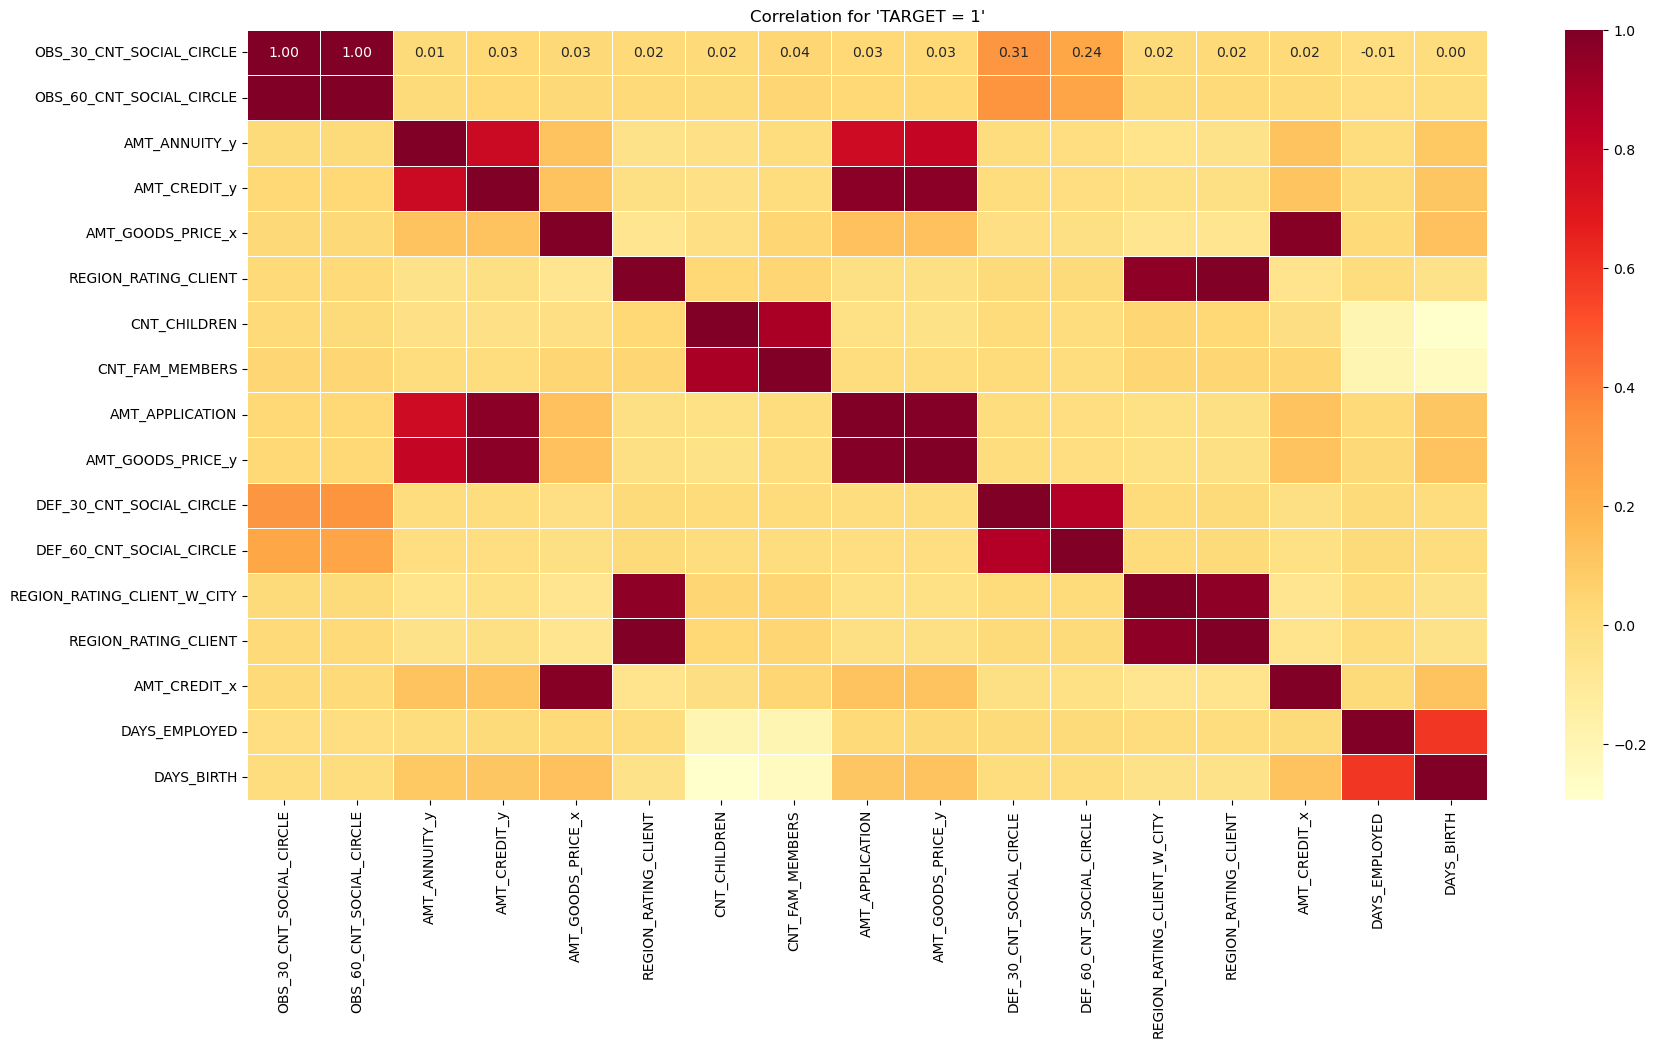

In [148]:
columns = ['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_ANNUITY_y','AMT_CREDIT_y','AMT_GOODS_PRICE_x',
           'REGION_RATING_CLIENT','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_APPLICATION','AMT_GOODS_PRICE_y',
           'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','AMT_CREDIT_x',
           'DAYS_EMPLOYED','DAYS_BIRTH']

selected_columns = payment_difficulty[columns]
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)
plt.title("Correlation for 'TARGET = 1'")
plt.show()

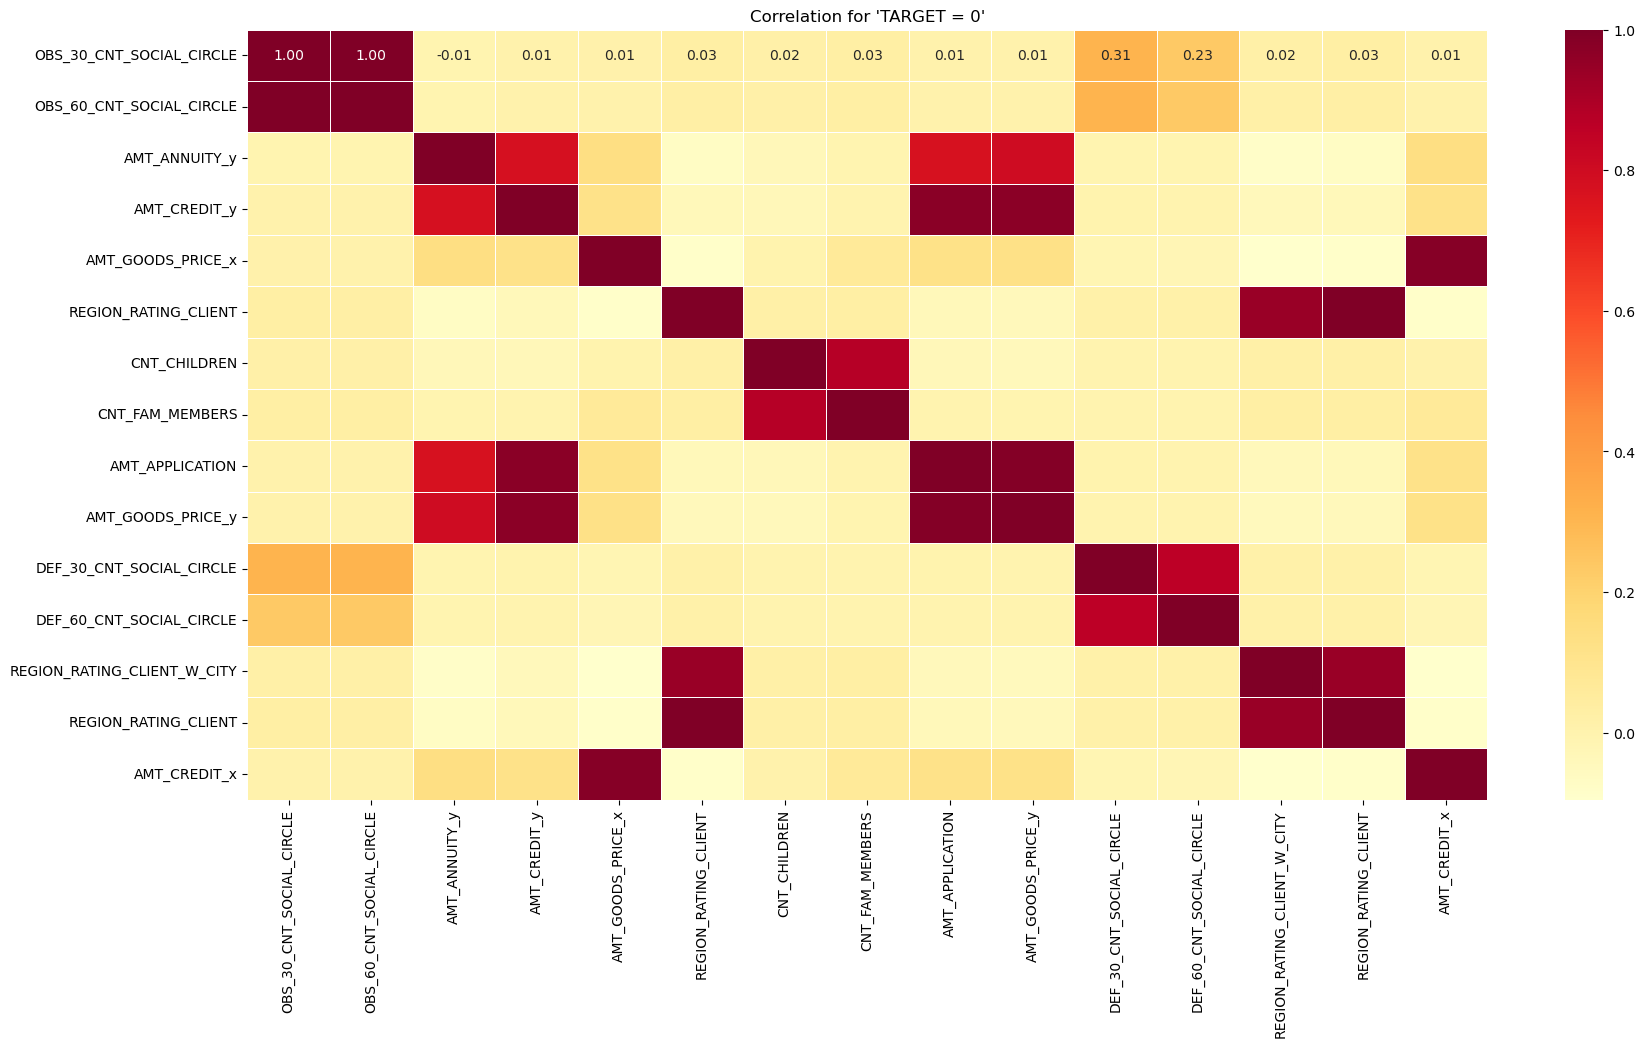

In [149]:
columns = ['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_ANNUITY_y','AMT_CREDIT_y','AMT_GOODS_PRICE_x',
           'REGION_RATING_CLIENT','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_APPLICATION','AMT_GOODS_PRICE_y',
           'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','AMT_CREDIT_x']

selected_columns_2 = no_payment_difficulty[columns]
correlation_matrix = selected_columns_2.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)
plt.title("Correlation for 'TARGET = 0'")
plt.show()

# DONE